In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


import statsmodels.api as sn
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [98]:
df_house = pd.read_csv('C:/Users/naren/OneDrive/Desktop/dataset/train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
df_house.shape

(1460, 81)

In [100]:

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [101]:
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype('object')
df_house['YearBuilt'] = df_house['YearBuilt'].astype('str')
df_house['YearRemodAdd'] = df_house['YearRemodAdd'].astype('str')
df_house['MoSold'] = df_house['MoSold'].astype('str')
df_house['YrSold'] = df_house['YrSold'].astype('str')

In [102]:
df_house.drop('Id', axis=1, inplace=True)
df_house_copy = df_house.copy()

In [103]:
df_house_copy.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [104]:
def missing_values(df):
  missing_val_count_by_column = (df.isnull().sum()/df.shape[0])*100
  return missing_val_count_by_column[missing_val_count_by_column > 0]

In [105]:
missing_values(df_house_copy)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

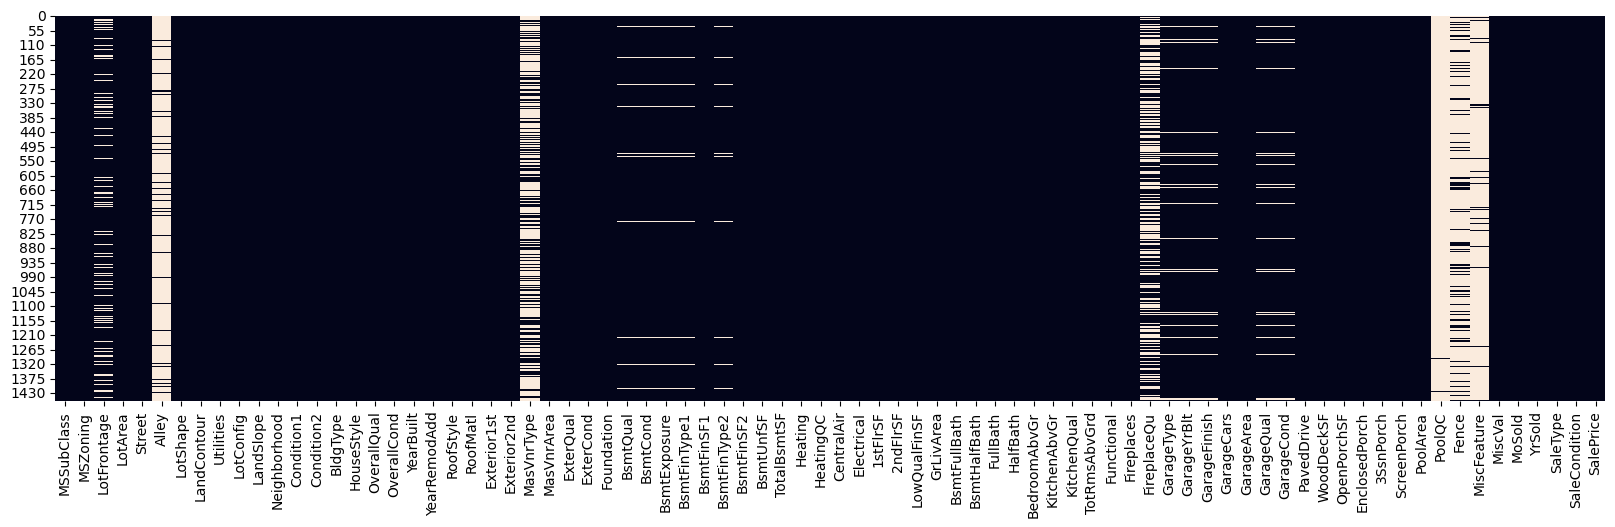

In [106]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_house_copy.isnull(), cbar=False)
plt.show()

In [107]:
df_house_copy.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)
missing_values(df_house_copy)

LotFrontage     17.739726
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [108]:
missing_value_df = missing_values(df_house_copy)

In [109]:
for col in missing_value_df.index:
  if df_house_copy[col].dtype == 'float64':
    df_house_copy[col].fillna(df_house_copy[col].mean(), inplace=True)
  if df_house_copy[col].dtype == 'object':
    df_house_copy[col].fillna(st.mode(df_house_copy[col]), inplace=True)

In [110]:
missing_values(df_house_copy)

MasVnrType    59.726027
dtype: float64

In [111]:
cat_cols = [df_house_copy.columns[i] for i in range(0, df_house_copy.shape[1])  if df_house_copy.iloc[:,i].dtype=='O']

encoded = df_house_copy.loc[:,cat_cols]

label_encoder = LabelEncoder()
for col in encoded:
    encoded[col] = label_encoder.fit_transform(encoded[col])

In [112]:
df_house_copy.drop(cat_cols, axis=1, inplace=True)
pd.concat([df_house_copy, encoded])
df_house_copy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,3,836,192,84,0,0,0,0,0,250000


In [113]:
def data_split(df):
  X = df.drop('SalePrice', axis=1)
  y = df['SalePrice']

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

  return X_train, X_test, y_train, y_test

In [114]:
X_train, X_test, y_train, y_test = data_split(df_house_copy)


In [115]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.801160813958914

In [116]:
train_pred = MLR_model.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
round(np.sqrt(mse), 4)

34804.7598

In [117]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_test, y_test)

0.8188589549635151

In [118]:
train_pred = MLR_model.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
round(np.sqrt(mse), 4)

34804.7598

In [119]:
test_pred = MLR_model.predict(X_test)
mse = mean_squared_error(y_test, test_pred)
round(np.sqrt(mse), 4)

35942.839

In [120]:
X_train = sn.add_constant(X_train)
X_test = sn.add_constant(X_test)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

mlr_model = sn.OLS(y_train, X_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     152.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:52:18   Log-Likelihood:                -13872.
No. Observations:                1168   AIC:                         2.781e+04
Df Residuals:                    1137   BIC:                         2.796e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.564e+05   1.12e+05     -5.853      0.0

In [121]:
cat_cols = [df_house.columns[i] for i in range(0, df_house.shape[1])  if df_house.iloc[:,i].dtype=='O']

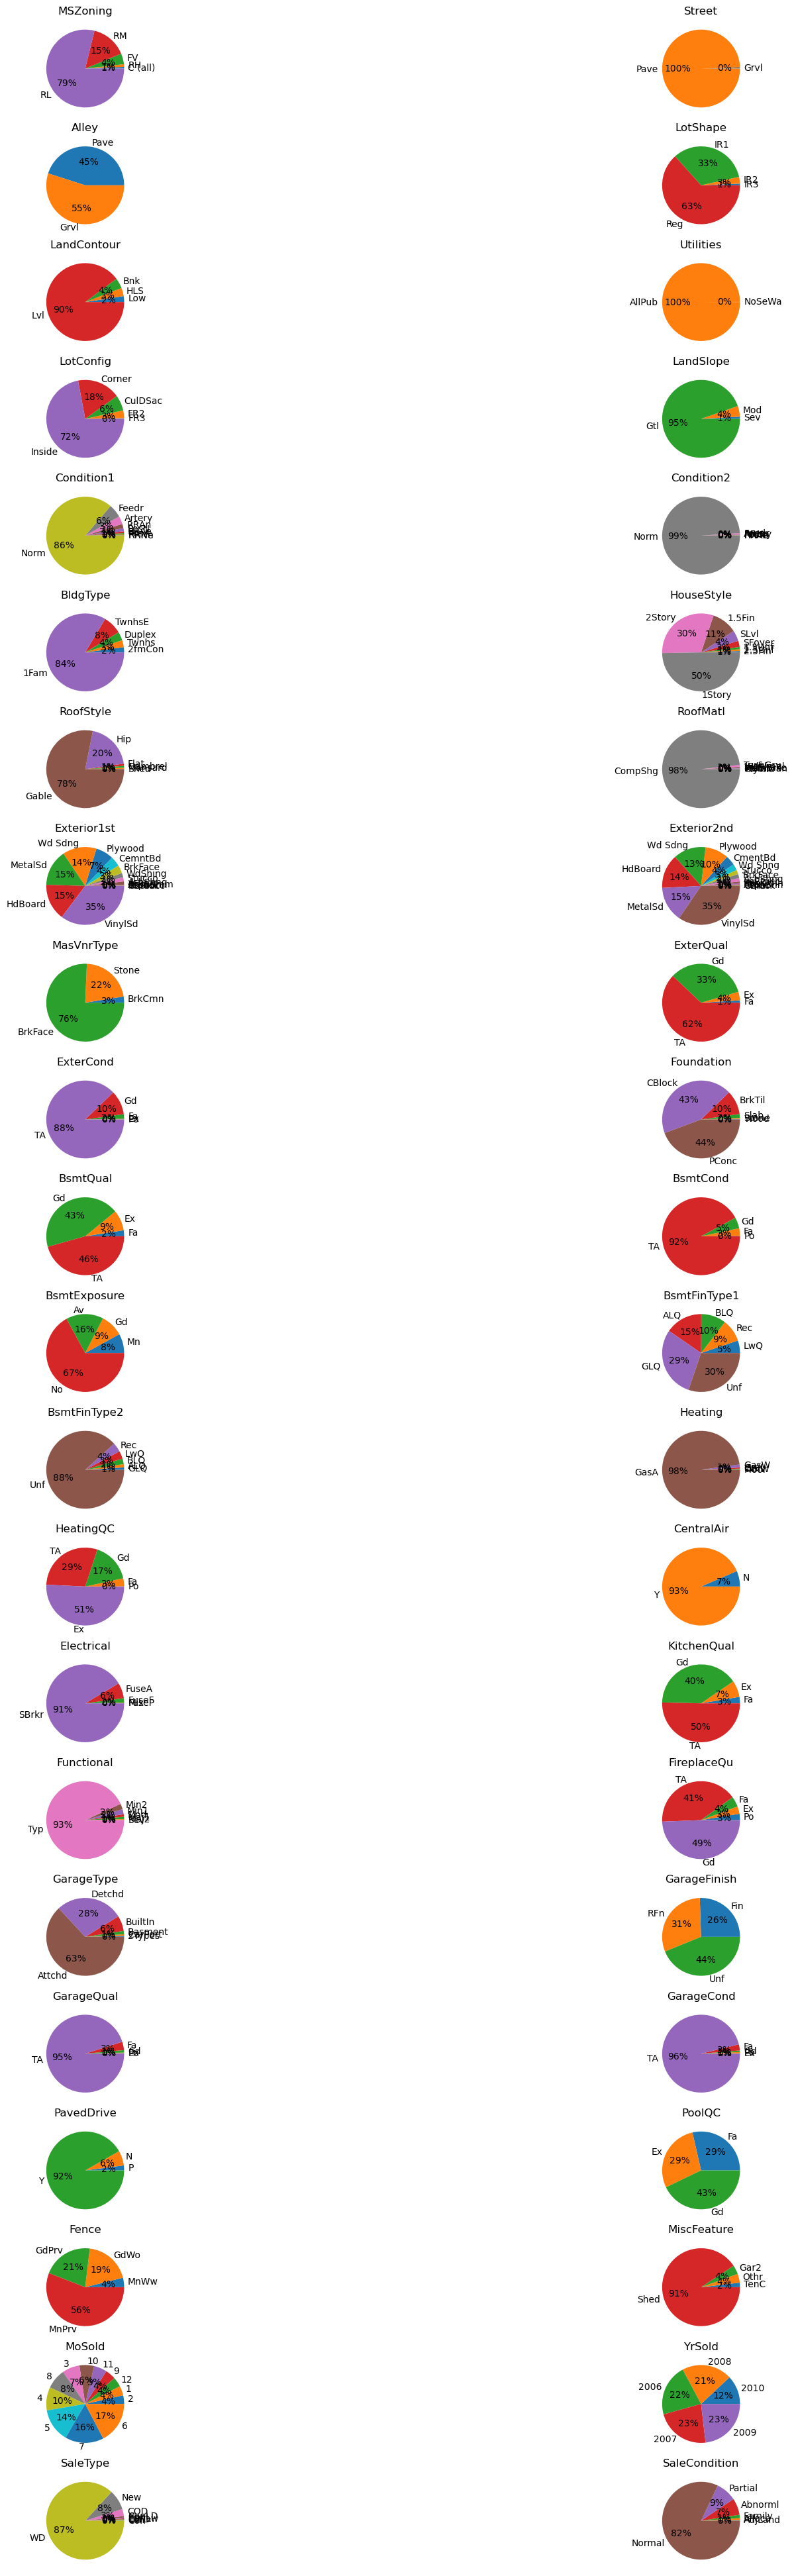

In [122]:
fig, axes = plt.subplots(22, 2, figsize=(22,50))
axes = [ax for axes_rows in axes for ax in axes_rows]

plot_cat_cols = cat_cols.copy()
plot_cat_cols.remove('Neighborhood')
plot_cat_cols.remove('YearBuilt')
plot_cat_cols.remove('YearRemodAdd')
plot_cat_cols.remove('GarageYrBlt')

for i, c in enumerate(df_house[plot_cat_cols]):
    df_house[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=10)
    axes[i].set_ylabel('')

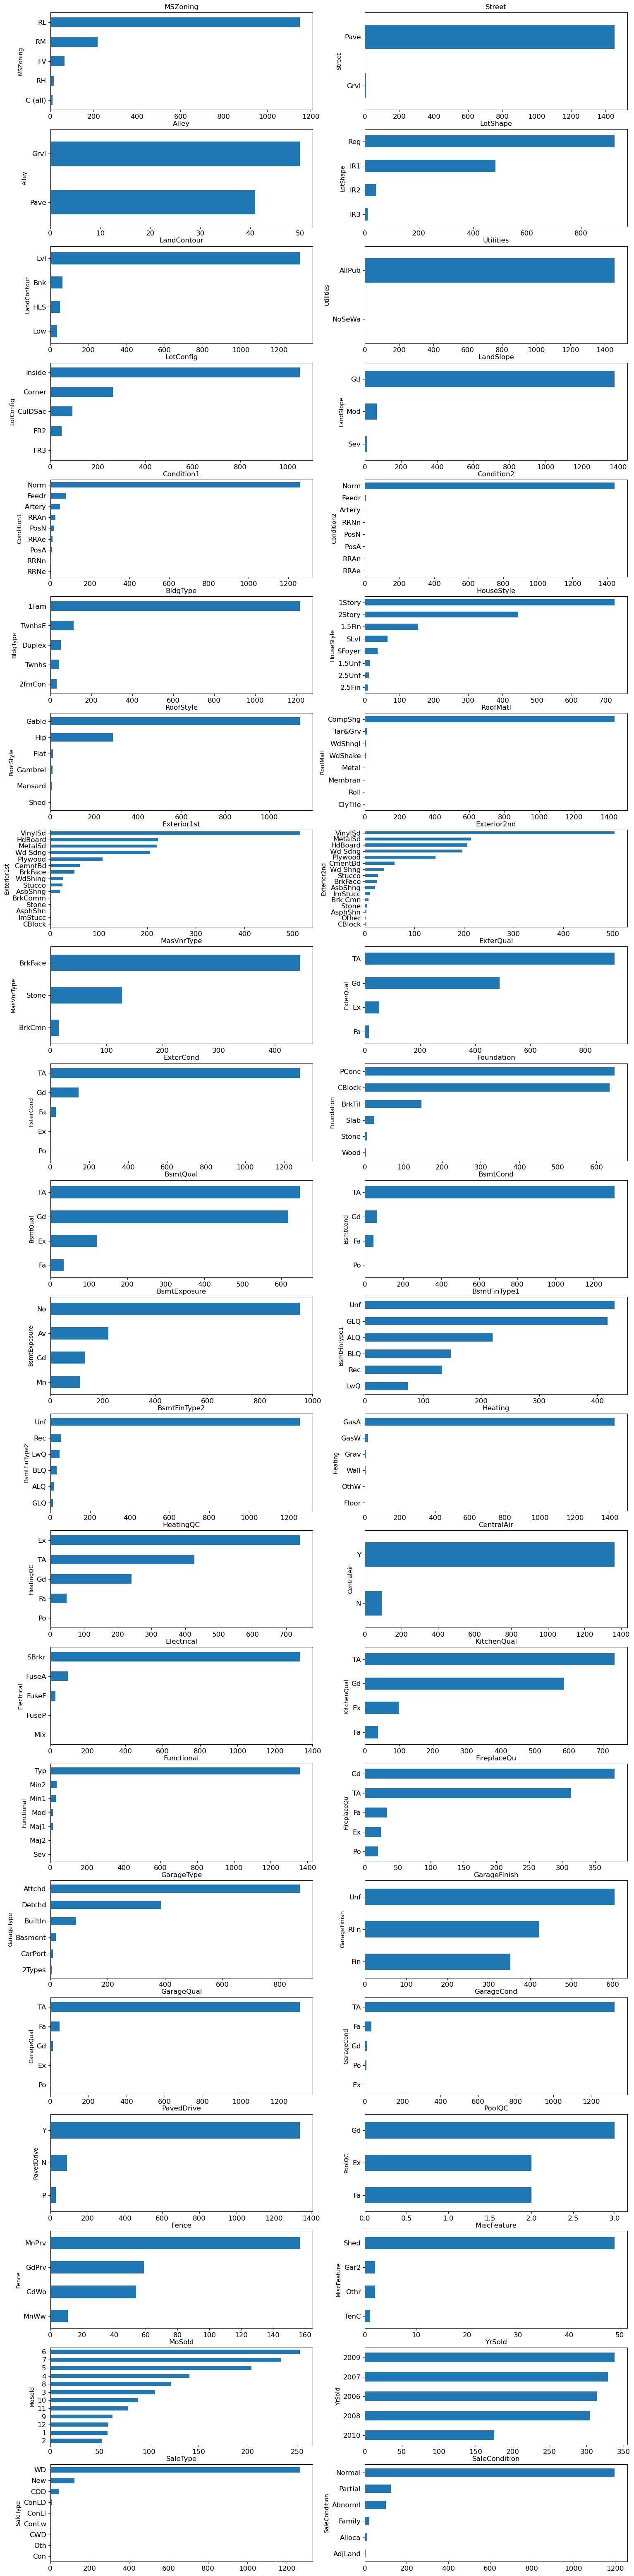

In [123]:
fig, axes = plt.subplots(22, 2, figsize=(18,80))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df_house[plot_cat_cols]):
    df_house[c].value_counts()[::-1].plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)

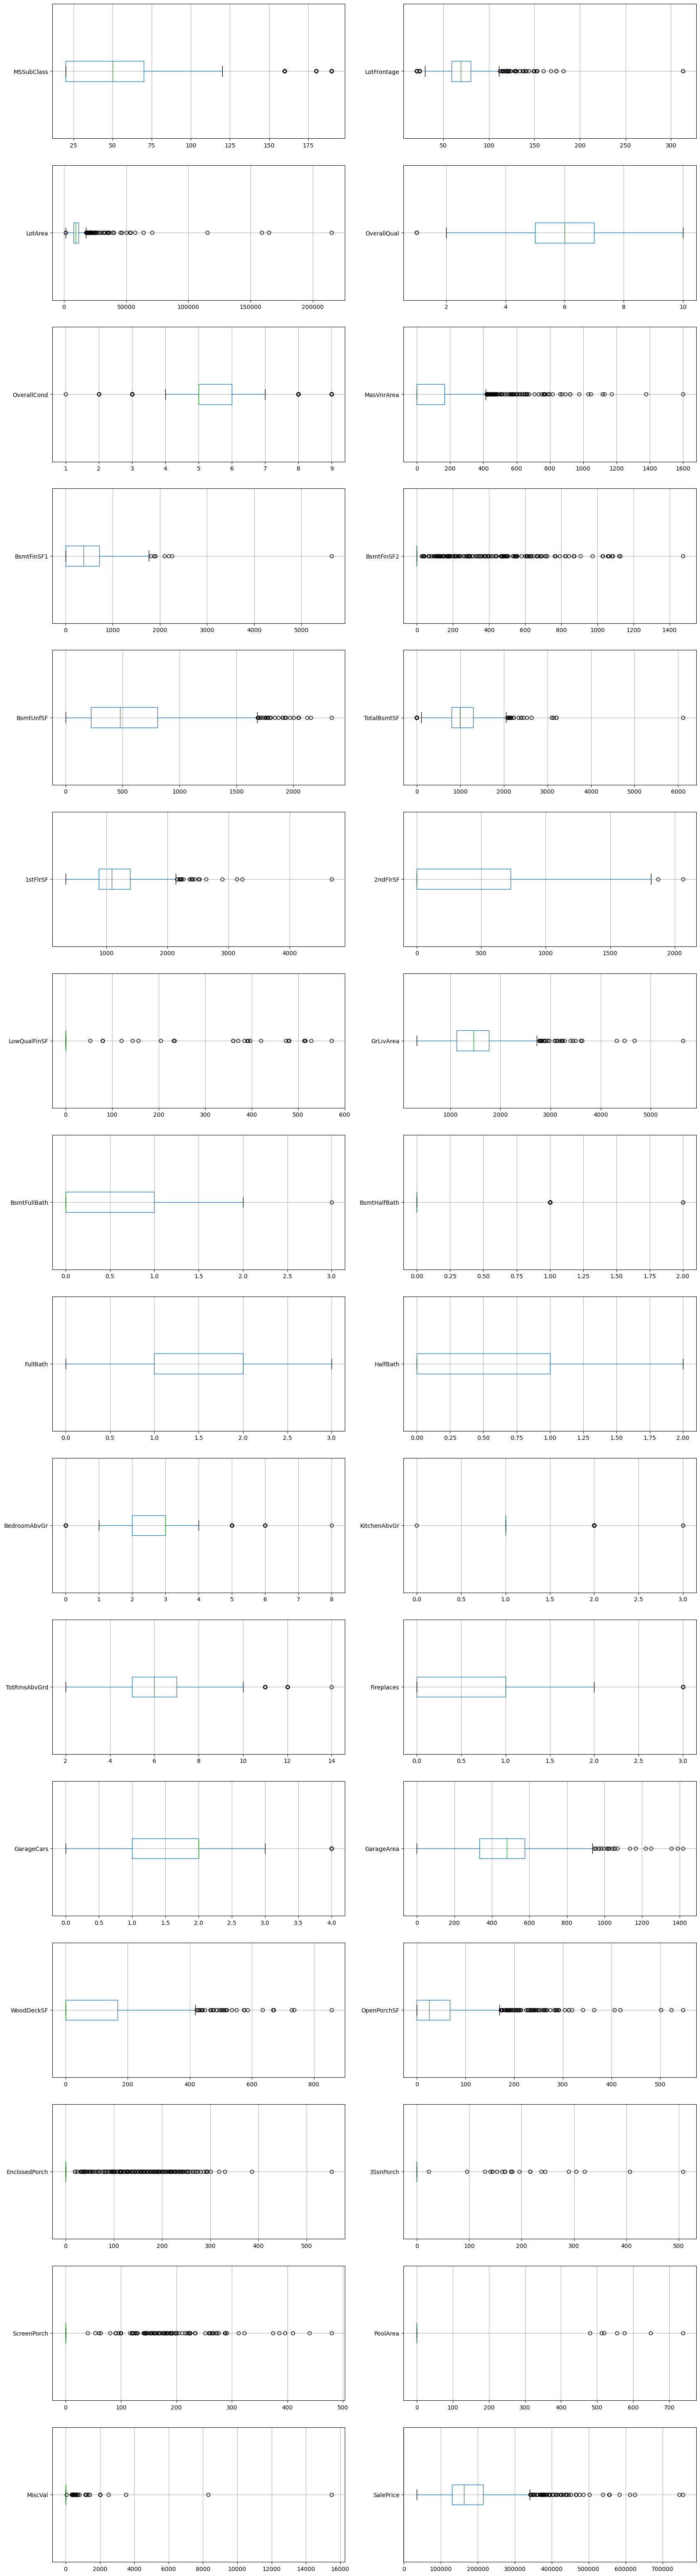

In [124]:
num_cols = [c for c in df_house.columns if c not in cat_cols]
     

fig, axes = plt.subplots(16, 2, figsize=(20,80))
y =0
for i,c in enumerate(df_house[num_cols]):
    pd.DataFrame(df_house[[c]]).boxplot(ax=axes.flatten()[i], vert=False)

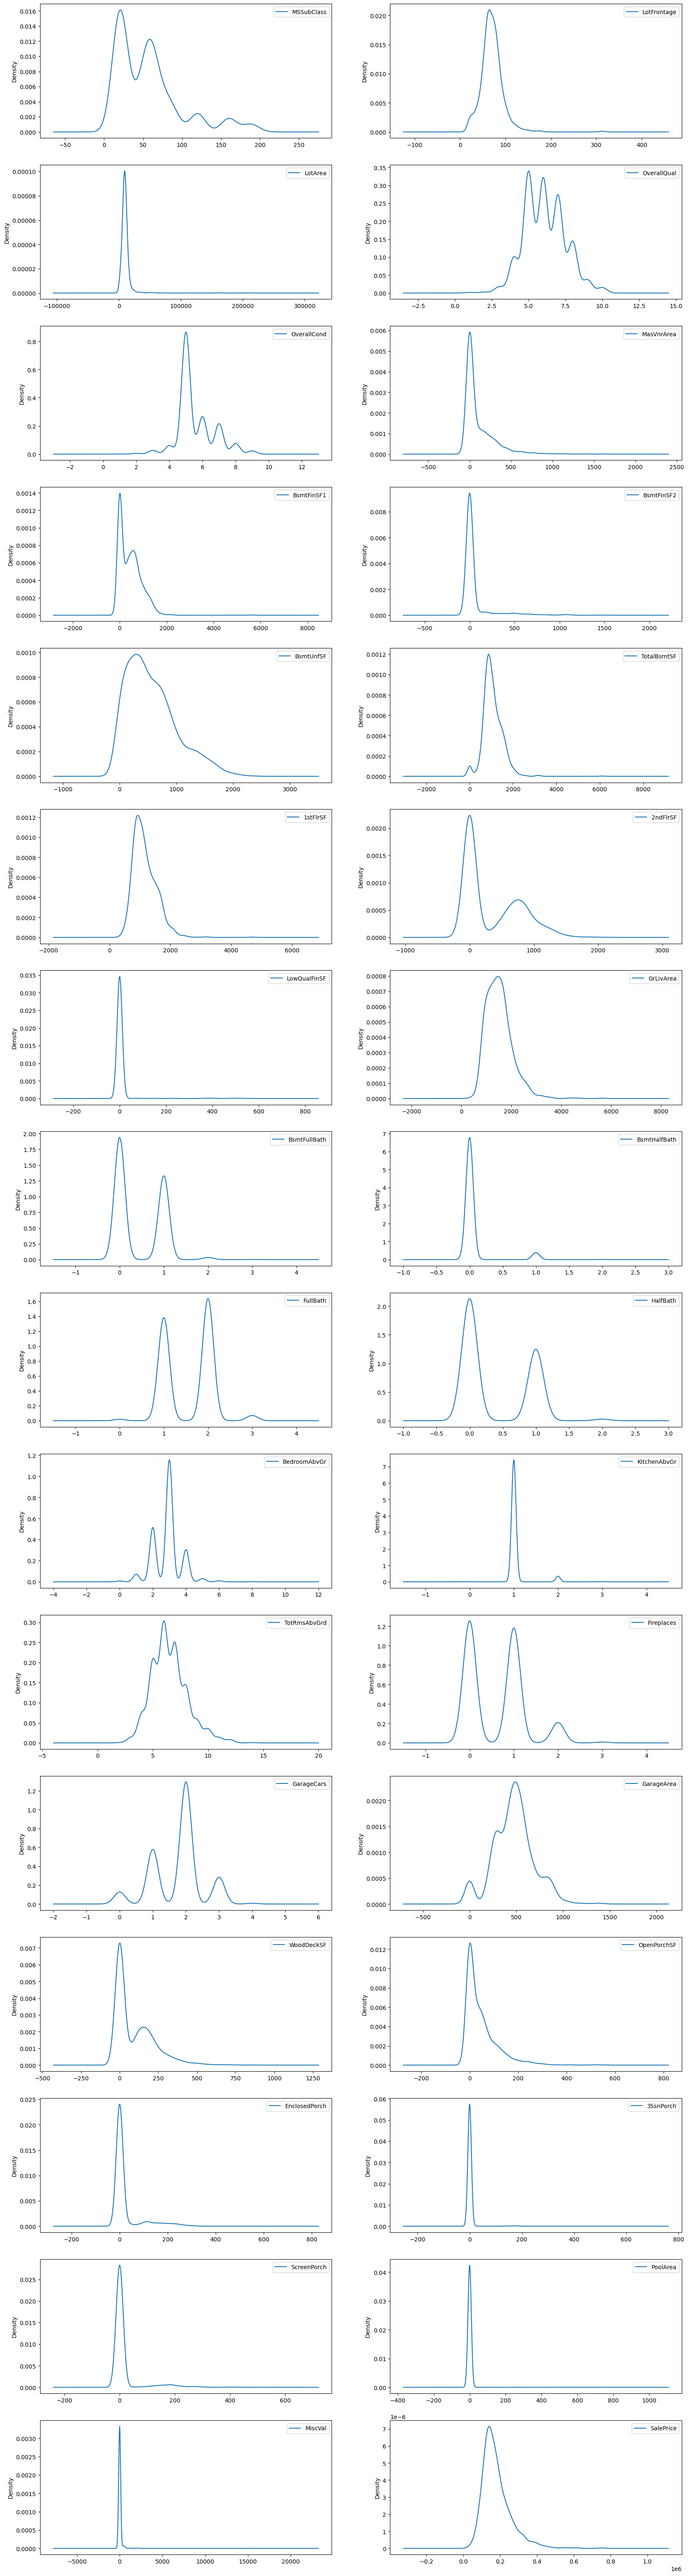

In [125]:
fig, axes = plt.subplots(16, 2, figsize=(20,80))
y =0
for i,c in enumerate(df_house[num_cols]):
    pd.DataFrame(df_house[[c]]).plot(kind='kde', ax=axes.flatten()[i])

In [126]:
missing_values(df_house[num_cols])

LotFrontage    17.739726
MasVnrArea      0.547945
dtype: float64

<Axes: xlabel='LotFrontage'>

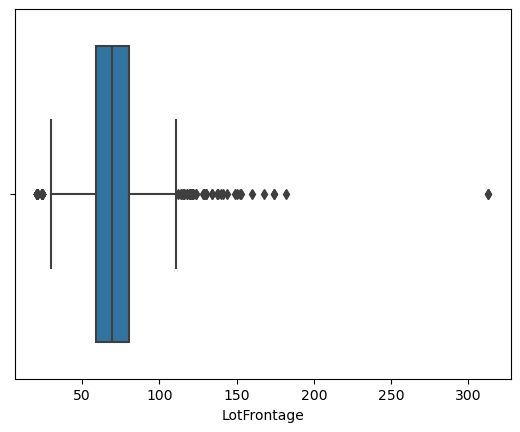

In [127]:
sns.boxplot(x = df_house['LotFrontage'])


In [128]:
df_house['LotFrontage'].fillna(df_house['LotFrontage'].median(), inplace=True)

<Axes: xlabel='MasVnrArea'>

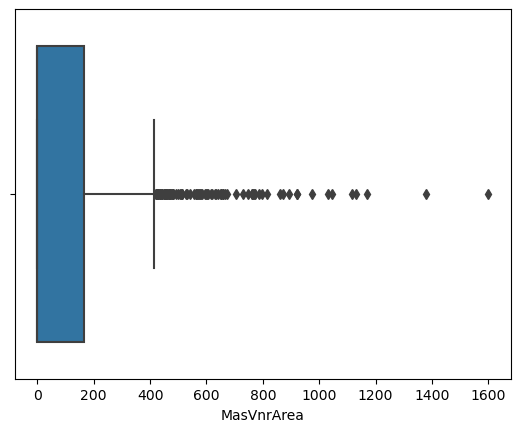

In [129]:
sns.boxplot(x = df_house['MasVnrArea'])

In [130]:
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].median(), inplace=True)

In [131]:
df_house[num_cols].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

In [132]:
object_nunique = list(map(lambda col: df_house[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Alley', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('MasVnrType', 3),
 ('GarageFinish', 3),
 ('PavedDrive', 3),
 ('PoolQC', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('KitchenQual', 4),
 ('Fence', 4),
 ('MiscFeature', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('FireplaceQu', 5),
 ('GarageQual', 5),
 ('GarageCond', 5),
 ('YrSold', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('Heating', 6),
 ('GarageType', 6),
 ('SaleCondition', 6),
 ('Functional', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('MoSold', 12),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25),
 ('YearRemodAdd', 61),
 ('GarageYrBlt', 97),
 ('YearBuilt', 112)]

In [133]:
low_cardinality_cols = [col for col in cat_cols if df_house[col].nunique() < 10]
high_cardinality_cols = list(set(cat_cols)-set(low_cardinality_cols))

In [134]:
OH_low_cardinal = pd.DataFrame()

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

for col in low_cardinality_cols:
    columns=[]
    for val in df_house[col].unique():
        name = ''+col+'_'+val
        columns.append(name)
    temp_df = pd.DataFrame(OH_encoder.fit_transform(df_house[[col]]), columns = columns)
    OH_low_cardinal = pd.concat([OH_low_cardinal, temp_df], axis=1)

OH_low_cardinal

C:\Users\naren\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\naren\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: can only concatenate str (not "float") to str

In [135]:
OH_high_cardinal = df_house.loc[:,high_cardinality_cols]

label_encoder = LabelEncoder()
for col in high_cardinality_cols:
    OH_high_cardinal[col] = label_encoder.fit_transform(OH_high_cardinal[col])
     

df_house.drop(cat_cols, axis=1, inplace=True)
df_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,3,836,192,84,0,0,0,0,0,250000


In [136]:
# merging one hot encoded, label encoded and numerical data
df_house = pd.concat([df_house, OH_low_cardinal], axis=1)
df_house = pd.concat([df_house, OH_high_cardinal], axis=1)

print(df_house.shape)
df_house.head()

(1460, 46)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MSZoning_RH,Street_Pave,Street_Grvl,YearBuilt,GarageYrBlt,Exterior2nd,Neighborhood,Exterior1st,YearRemodAdd,MoSold
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0.0,0.0,1.0,104,89,13,5,12,53,4
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0.0,0.0,1.0,77,62,8,24,8,26,7
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0.0,0.0,1.0,102,87,13,5,12,52,11
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0.0,0.0,1.0,19,84,15,6,13,20,4
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0.0,0.0,1.0,101,86,13,15,12,50,3


In [137]:
min_max = MinMaxScaler()

new_num_col = num_cols.copy()
new_num_col.remove('SalePrice')

for col in new_num_col:
    df_house[[col]] = min_max.fit_transform(df_house[[col]])
     
#Train-test split

X_train, X_test, y_train, y_test = data_split(df_house)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1168, 45)
X_test: (292, 45)
y_train: (1168,)
y_test: (292,)


In [138]:
def standardize(X_train, X_test):
  scaler = StandardScaler()

  X_train_scalar = scaler.fit_transform(X_train)
  X_train = pd.DataFrame(X_train_scalar, columns = X_train.columns)

  X_test_scalar = scaler.fit_transform(X_test)
  X_test = pd.DataFrame(X_test_scalar, columns = X_test.columns)

  return X_train, X_test

In [139]:
X_train, X_test = standardize(X_train, X_test)
     

X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MSZoning_RH,Street_Pave,Street_Grvl,YearBuilt,GarageYrBlt,Exterior2nd,Neighborhood,Exterior1st,YearRemodAdd,MoSold
0,0.790872,-0.133068,-0.178830,-0.828481,1.263326,-0.587843,1.362412,-0.275999,-0.857658,0.450895,...,-0.416976,-0.050746,0.050746,-2.229553,1.222017,-0.702255,-0.874654,-0.537494,0.855995,1.521014
1,3.168272,-0.444183,0.026099,-1.558795,1.263326,-0.587843,-0.977109,-0.275999,-1.276879,-2.388707,...,-0.416976,-0.050746,0.050746,-2.229553,1.222017,-0.702255,0.790539,-0.537494,0.710215,1.182754
2,-0.873308,-0.221958,-0.179843,0.632147,-0.537241,-0.587843,-0.925312,-0.275999,1.590772,0.535726,...,-0.416976,-0.050746,0.050746,1.125333,0.980556,0.733226,-1.207692,0.725671,0.953181,0.844493
3,0.077652,0.533606,0.075432,0.632147,0.363042,1.326545,-0.068494,-0.275999,-0.416138,-0.587167,...,-0.416976,-0.050746,0.050746,0.571950,0.336660,-0.128063,1.290096,-0.221703,0.175692,-2.199852
4,0.077652,-0.355293,-0.316800,-0.098167,-0.537241,-0.587843,0.660988,-0.275999,-1.098487,-0.515730,...,-0.416976,-0.050746,0.050746,1.090747,0.940313,0.733226,-0.708134,0.725671,0.904588,-0.170289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.873308,0.355826,-0.040759,-0.098167,-0.537241,0.391873,-0.977109,-0.275999,1.095734,-0.013442,...,-0.416976,-0.050746,0.050746,0.053153,-0.266992,-1.276447,0.290981,-1.169076,-0.553203,1.182754
1164,-0.873308,0.444716,-0.063045,-0.828481,-0.537241,0.031518,-0.213096,1.515887,-0.358160,-0.031301,...,-0.416976,-0.050746,0.050746,-0.638576,-1.071862,-1.276447,-0.042058,-1.169076,-1.525064,-0.846810
1165,0.315392,-0.444183,-0.370792,-0.098167,1.263326,-0.587843,-0.977109,-0.275999,0.248372,-0.861751,...,2.398217,-0.050746,0.050746,-1.918275,1.222017,1.020322,-0.541615,1.041462,1.001774,-0.508549
1166,2.455052,-2.177535,-0.897752,-0.098167,-2.337808,2.813011,-0.204463,-0.275999,-0.998142,-1.310462,...,2.398217,-0.050746,0.050746,-0.050606,-0.387723,-1.276447,-1.707250,-1.169076,-0.698982,1.182754


In [140]:
linreg = LinearRegression()

linreg_forward = sfs(estimator=linreg, k_features = 100, forward=True,
                     verbose=2, scoring='r2')
sfs_forward = linreg_forward.fit(X_train, y_train)
     

AttributeError: k_features must be between 1 and X.shape[1].

In [141]:
sfs_forward.k_feature_names_

NameError: name 'sfs_forward' is not defined

In [142]:
X_train, X_test, y_train, y_test = data_split(df_house)

X_train = X_train[list(sfs_forward.k_feature_names_)]
X_test = X_test[list(sfs_forward.k_feature_names_)]

X_train, X_test = standardize(X_train, X_test)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

NameError: name 'sfs_forward' is not defined

In [143]:

X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MSZoning_RH,Street_Pave,Street_Grvl,YearBuilt,GarageYrBlt,Exterior2nd,Neighborhood,Exterior1st,YearRemodAdd,MoSold
921,0.411765,0.157534,0.034948,0.444444,0.750,0.00000,0.192062,0.000000,0.080479,0.208183,...,0.0,0.0,1.0,9,97,8,7,8,53,11
520,1.000000,0.133562,0.044404,0.333333,0.750,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,9,97,8,17,8,50,10
401,0.000000,0.150685,0.034901,0.666667,0.500,0.00000,0.004252,0.000000,0.550514,0.214403,...,0.0,0.0,1.0,106,91,13,5,12,55,9
280,0.235294,0.208904,0.046680,0.666667,0.625,0.21250,0.074592,0.000000,0.165240,0.132079,...,0.0,0.0,1.0,90,75,10,20,9,39,0
1401,0.235294,0.140411,0.028582,0.555556,0.500,0.00000,0.134479,0.000000,0.034247,0.137316,...,0.0,0.0,1.0,105,90,13,8,12,54,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.000000,0.195205,0.041319,0.555556,0.500,0.10875,0.000000,0.000000,0.455479,0.174141,...,0.0,0.0,1.0,75,60,6,14,6,24,10
905,0.000000,0.202055,0.040291,0.444444,0.500,0.06875,0.062721,0.196744,0.176370,0.172831,...,0.0,0.0,1.0,55,40,6,12,6,4,4
1096,0.294118,0.133562,0.026091,0.555556,0.750,0.00000,0.000000,0.000000,0.292808,0.111948,...,1.0,0.0,1.0,18,97,14,9,13,56,5
235,0.823529,0.000000,0.001776,0.555556,0.250,0.37750,0.063430,0.000000,0.053510,0.079051,...,1.0,0.0,1.0,72,57,6,2,6,21,10


In [144]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)
     

0.8088518916992357

In [145]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_test, y_test)

0.8140649568586642

In [146]:
train_pred = MLR_model.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
print('RMSE for train data',round(np.sqrt(mse), 4))

test_pred = MLR_model.predict(X_test)
mse = mean_squared_error(y_test, test_pred)
print('RMSE for test data',round(np.sqrt(mse), 4))

RMSE for train data 34124.9996
RMSE for test data 36415.3566


In [147]:
X_train = sn.add_constant(X_train)
X_test = sn.add_constant(X_test)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

mlr_model = sn.OLS(y_train, X_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     116.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:39   Log-Likelihood:                -13849.
No. Observations:                1168   AIC:                         2.778e+04
Df Residuals:                    1126   BIC:                         2.799e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.472e+04   9292.666     -2.661      0.0